In [217]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [218]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 6: Máquinas de Vectores de Soporte

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Genera un dataset de clasificación binaria $\pm1$, de veinte instancias, aleatorio, de dos características, que sea linealmente separable. Grafique el dataset generado y coloree los puntos deacuerdo a su etiqueta.

In [219]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data_one(n=20, seed=None):
    np.random.seed(seed)

    # Generar características aleatorias
    X = np.random.uniform(-5, 5, size=(n, 2))

    # Etiquetar puntos como +1 o -1 según su posición
    y = np.zeros(n)
    for i in range(n):
        if X[i, 1] > 0.5 * X[i, 0] + 1:
            y[i] = 1
        else:
            y[i] = -1

    return X, y


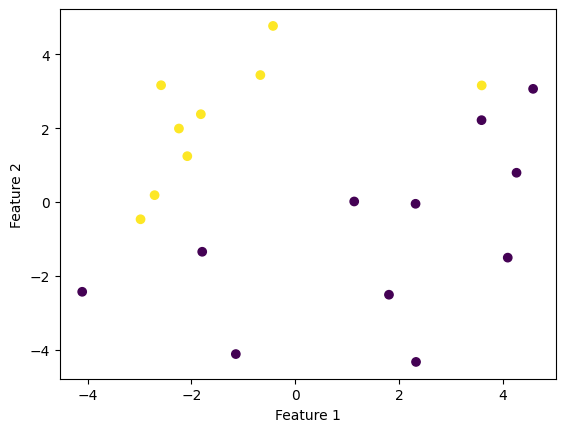

In [220]:
X, y = generate_data_one()

# Visualizar el dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Asignación 2

Genera un dataset de clasificación binaria $\pm1$, de veinte instancias, aleatorio, de dos características, que contenga todos los puntos de una clase entre dos parábolas y los puntos por arriba o por debajo de estas parábolas pertenezcan a la otra clase. Grafique el dataset generado y coloree los puntos deacuerdo a su etiqueta.

In [221]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(num_samples):
    x1 = np.random.uniform(-10, 10, size=num_samples)
    x2 = np.random.uniform(-10, 10, size=num_samples)
    y = np.zeros(num_samples)
    for i in range(num_samples):
        if x2[i] < x1[i]**2 - 5 or x2[i] > x1[i]**2 + 5:
            y[i] = 1
        else:
            y[i] = -1
    return x1, x2, y


In [222]:
x1, x2, y = generate_dataset(20)

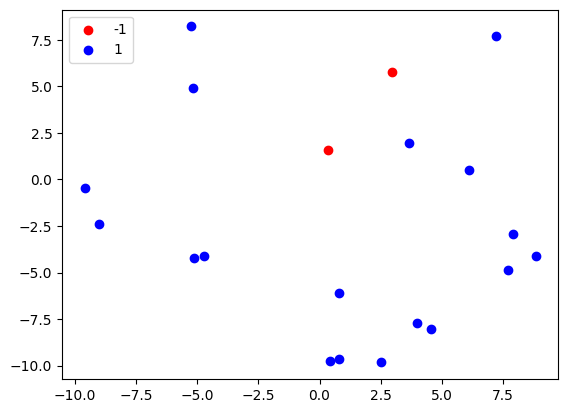

In [223]:

fig, ax = plt.subplots()
colors = {-1: 'red', 1: 'blue'}
for label, color in colors.items():
    mask = (y == label)
    ax.scatter(x1[mask], x2[mask], c=color, label=label)
ax.legend()
plt.show()

## Asignación 3

Implemente una clase que permita ajustar un modelo de Máquinas de Vectores de Soporte a mano. La clase debe cumplir con los siguientes requisitos:

- Debe contar con un método para realizar el entrenamiento en caso de ser requerido.
- Debe contar con un método para realizar las predicciones.
- Debe de poder utilizar un kernel de identidad o de RBF.
- Debe almacenar los vectores de soporte.

In [224]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SVM:

    def __init__(self, C=1.0, kernel="rbf", gamma=0.1):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0
        self.kernel = kernel
        self.gamma = gamma
        if kernel == "rbf":
            self.kernel = lambda xi, xj: np.exp(-gamma * np.linalg.norm(xi - xj) ** 2)
        
   

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            if self.kernel == "identity":
                opt_term = y[i] * ((np.dot(w, x[i])) + b)


            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]
        # The number of Samples in X
        number_of_samples = X.shape[0]
        c = self.C
        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)
        # Shuffling the samples randomly
        np.random.shuffle(ids)
        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

## Asignación 4

Entrene un modelo de SVM (utilizando la clase implementada anteriormente) utilizando el dataset generado en la asignación 1 y un kernel de identidad. Grafique las predicciones de su modelo y marque los puntos que son vectores de soporte.

Loss: 0.06748936988471776
Prediction: [ 1.  1. -1.  1. -1. -1.  1.  1.  1. -1.]
Accuracy: 0.9
w, b: [array([[-0.36519231,  0.82946848]]), -0.017]


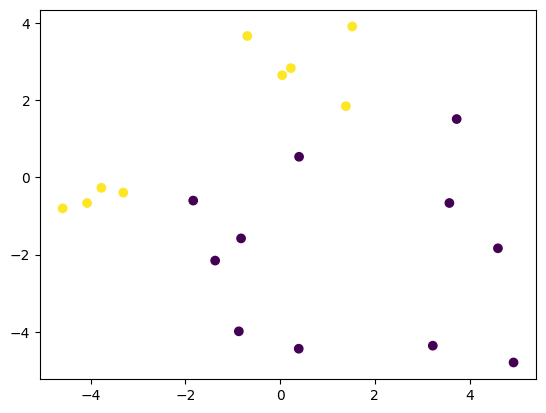

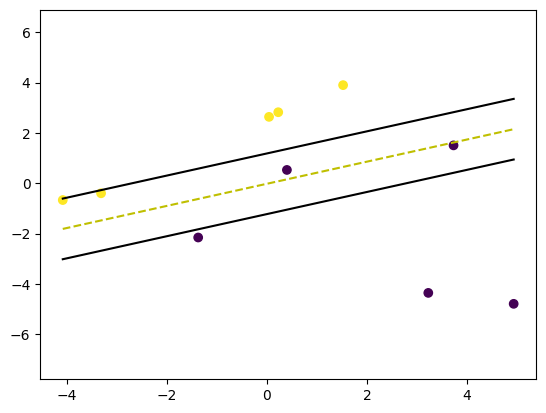

In [225]:
X, y = generate_data_one()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
svm = SVM(kernel="identity")

w, b, losses = svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()

## Asignación 5

Entrene un modelo de SVM (utilizando la clase implementada anteriormente) utilizando el dataset generado en la asignación 2 y un kernel de RBF. Grafique las predicciones de su modelo y marque los puntos que son vectores de soporte.

Loss: 2.0342872480651994
Prediction: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.8
w, b: [array([[-0.01452793, -0.01322762]]), 1.035999999999989]


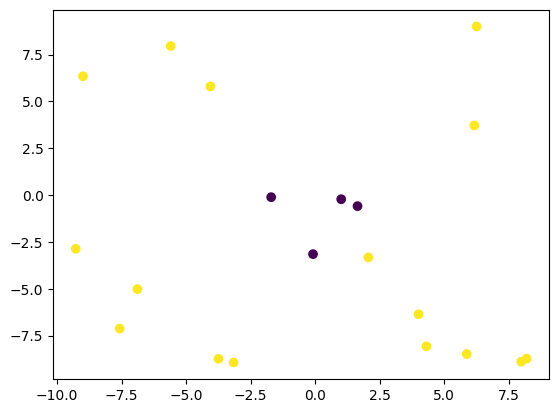

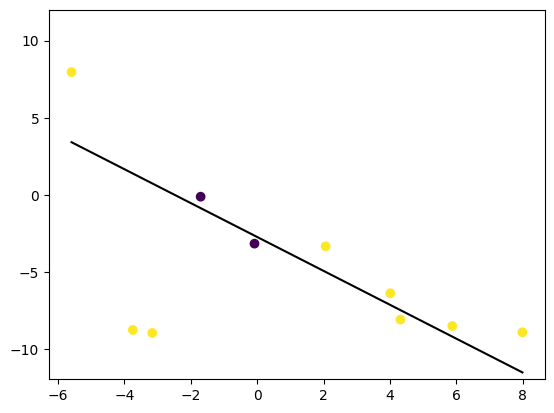

In [226]:
x1, x2, y = generate_dataset(20)
X = np.column_stack((x1, x2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
svm = SVM(kernel="identity")

w, b, losses = svm.fit(X_train, y_train)
prediction = svm.predict(X_test)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)


# Visualizing SVM
def visualize_svm():

    def get_hyperplane_value(x, w, b, offset):
        return (-w[0][0] * x + b + offset) / w[0][1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


visualize_dataset()
visualize_svm()